In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [31]:
print(data.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [32]:
data = data.dropna()

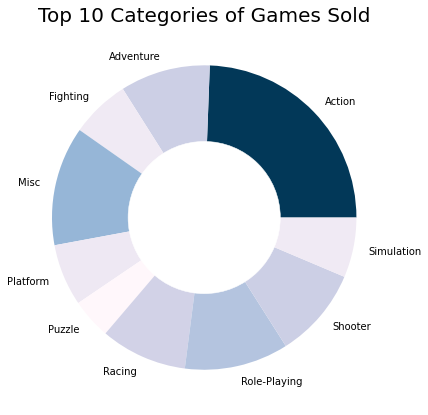

In [36]:
plt.style.use('ggplot')
import matplotlib as mpl
game = data.groupby("Genre")["Global_Sales"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Categories of Games Sold", fontsize=20)
plt.show()

                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178027 -0.400315 -0.379137 -0.269323    -0.332735   
Year          0.178027  1.000000 -0.091285  0.006108 -0.169387     0.041128   
NA_Sales     -0.400315 -0.091285  1.000000  0.768923  0.451283     0.634518   
EU_Sales     -0.379137  0.006108  0.768923  1.000000  0.436379     0.726256   
JP_Sales     -0.269323 -0.169387  0.451283  0.436379  1.000000     0.290559   
Other_Sales  -0.332735  0.041128  0.634518  0.726256  0.290559     1.000000   
Global_Sales -0.426975 -0.074647  0.941269  0.903264  0.612774     0.747964   

              Global_Sales  
Rank             -0.426975  
Year             -0.074647  
NA_Sales          0.941269  
EU_Sales          0.903264  
JP_Sales          0.612774  
Other_Sales       0.747964  
Global_Sales      1.000000  


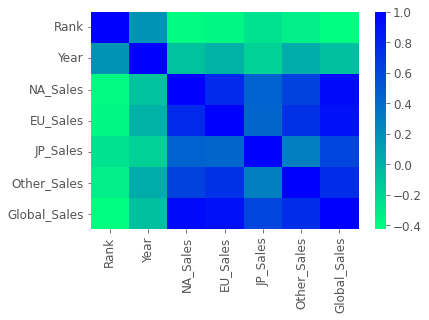

In [38]:

print(data.corr())
sns.heatmap(data.corr(), cmap="winter_r")
plt.show()

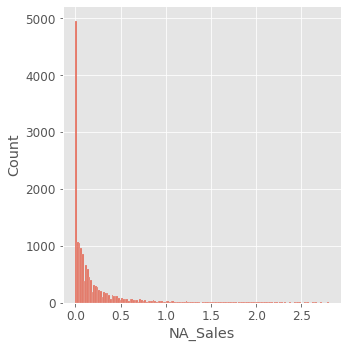

In [45]:
sns.displot(data['NA_Sales'])
data2=data.copy()
q=data2['NA_Sales'].quantile(0.99)
data=data2[data2['NA_Sales']<q]

In [46]:
data1=data.copy()
data1=pd.get_dummies(data,drop_first=True)

In [47]:
targets=data1['Global_Sales']
inputs=data1.drop(['Global_Sales'],axis=1)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)
scaled_inputs=scaler.fit_transform(inputs)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_inputs,
                                               targets,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_train,y_train)
yhat=reg.predict(x_train)

In [ ]:
reg.fit(x_test,y_test)
y_testhat=reg.predict(x_test)
reg.score(x_test,y_test)

In [ ]:
sns.scatterplot(x=y_test,y=y_testhat)